CUSTOMER PURCHASE PREDICTION

PROJECT DESCRIPTION

In this endeavor, my aim is to construct a decision tree classifier capable of predicting customer purchasing behavior using a dataset sourced from the UCI Machine Learning Repository. This dataset comprises demographic and behavioral data including age, occupation, marital status, education level, account balance, and other pertinent features. The objective is to create a predictive model that can aid marketing strategies by pinpointing prospective customers more inclined to make purchases.

In [12]:
    "import useful libraries \n",
    "import pandas as pd\n",
    "import numpy as np\n",
    "import seaborn as sns \n",
    "import matplotlib.pyplot as plt \n",
    "%matplotlib inline\n",
    "\n",
    "from sklearn.preprocessing import MinMaxScaler\n",
    "from sklearn.compose import ColumnTransformer\n",
    "from sklearn.preprocessing import OneHotEncoder  \n",
    "from sklearn.model_selection import train_test_split\n",
    "from imblearn.over_sampling import SMOTE \n",
    "from sklearn.tree import DecisionTreeClassifier\n",
    "from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,roc_auc_score,log_loss\n",
    "from sklearn.pipeline import Pipeline\n",
    "from sklearn.model_selection import GridSearchCV, StratifiedKFold\n",
    "\n",
    "import warnings\n",
    "warnings.filterwarnings(\"ignore\")"

'warnings.filterwarnings("ignore")'

In [13]:
# Define the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    # Obtain summary statistics
    def get_summary_statistics(self):
        summary_stats = self.dataframe.describe()
        return summary_stats
    
    # Count missing values
    def get_missing_values(self):
        missing_values = self.dataframe.isnull().sum()
        return missing_values
    
    # Get DataFrame summary
    def get_info(self):
        info = self.dataframe.info()
        return info
    
    # Retrieve data types
    def get_dtypes(self):
        dtypes = self.dataframe.dtypes
        return dtypes
    
    # Count value occurrences for each column
    def get_value_counts(self):
        value_counts = {}
        for column in self.dataframe.columns:
            value_counts[column] = self.dataframe[column].value_counts()
        return value_counts


In [15]:
# load the data
bank = pd.read_csv('C:\\Users\\biraj\\OneDrive\\Desktop\\Project\\T3\\bank-full.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
# Initialize the DataUnderstanding object
data_understanding = DataUnderstanding(bank)

Get the summary statistics


du.get_summary_statistics()


In [19]:
# Retrieve summary information about the data
data_understanding.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [20]:
# Retrieve data types of the columns
data_understanding.get_dtypes()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

DATA PREPARATION

Check for missing values

In [26]:
# Replace 'unknown' values with NaN for categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
bank[categorical_columns] = bank[categorical_columns].replace('unknown', pd.NA)

In [27]:
# Check for any missing values in the dataset
data_understanding.get_missing_values()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Dealing with missing values

Job has a few missing values i can drop the rows with missing values

In [30]:
# Remove rows with missing values in the 'job' column
bank.dropna(subset=['job'], inplace=True)

Drop both the poutcome column and contact

In [33]:
bank= bank.drop(['poutcome', 'contact'], axis=1)

In [35]:
# Fill missing values in the 'education' column with the mode value. This approach helps maintain data integrity while minimizing the impact on the overall distribution.
bank['education'].fillna(bank['education'].mode()[0], inplace=True)

In [37]:
bank.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [38]:
data_understanding.get_value_counts()


{'age': age
 32    2084
 31    1990
 33    1964
 34    1926
 35    1887
       ... 
 93       2
 90       2
 95       2
 88       2
 94       1
 Name: count, Length: 77, dtype: int64,
 'job': job
 blue-collar      9732
 management       9458
 technician       7597
 admin.           5171
 services         4154
 retired          2264
 self-employed    1579
 entrepreneur     1487
 unemployed       1303
 housemaid        1240
 student           938
 Name: count, dtype: int64,
 'marital': marital
 married     27011
 single      12722
 divorced     5190
 Name: count, dtype: int64,
 'education': education
 secondary    23131
 tertiary     13262
 primary       6800
 Name: count, dtype: int64,
 'default': default
 no     44110
 yes      813
 Name: count, dtype: int64,
 'balance': balance
  0        3486
  1         194
  2         155
  4         139
  3         131
           ... 
 -923         1
 -1445        1
  10655       1
  4153        1
  16353       1
 Name: count, Length: 7142, dtype:

#### Identifying outliers and eliminating them


In [39]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [40]:
plt.style.use('classic')


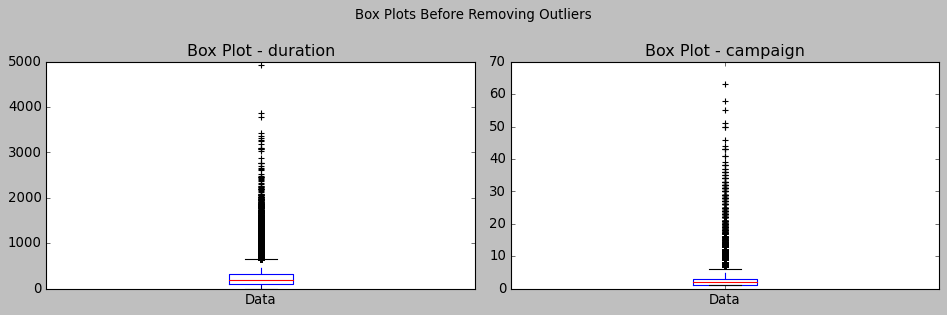

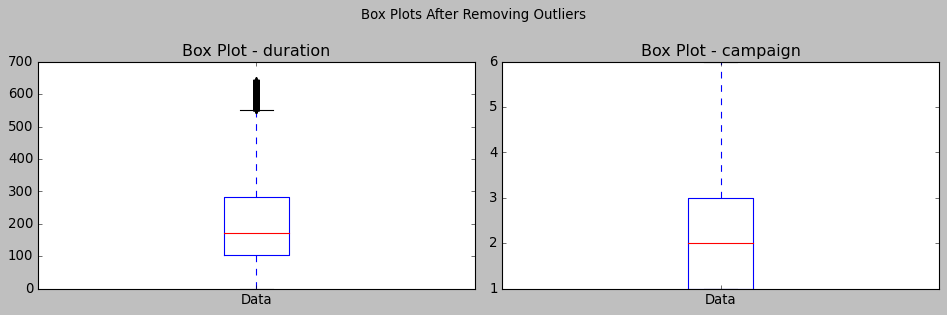

In [43]:
# Define a function to plot box plots
def plot_boxplots(data, column_names, title):
    plt.figure(figsize=(12, 4))
    for i, column in enumerate(column_names, 1):
        plt.subplot(1, len(column_names), i)
        plt.boxplot(data[column])
        plt.title(f'Box Plot - {column}')
        plt.xticks([1], ['Data'])

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Specify the numeric columns to check for outliers
numeric_columns = ['duration', 'campaign']

# Plot box plots before removing outliers
plot_boxplots(bank, numeric_columns, 'Box Plots Before Removing Outliers')

# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column_names):
    outliers_removed = df.copy()
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect and remove outliers
        outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) &
                                              (outliers_removed[column] <= upper_bound)]

    return outliers_removed

# Detect and remove outliers
bank = remove_outliers_iqr(bank, numeric_columns)

# Plot box plots after removing outliers
plot_boxplots(bank, numeric_columns, 'Box Plots After Removing Outliers')


EXPLORATORY DATA ANALYSIS

Univariate analysis involves examining the distribution of individual variables

Subscription rate

In typical scenarios, the dependent variable is denoted as "y," representing whether the customer subscribed to a term deposit. This variable signifies the binary outcome of interest, indicating whether a customer made a particular decision or took a specific action—in this context, subscribing to a term deposit or not.

In [48]:
# count of subscription rate
bank['y'].value_counts(normalize=True)

y
no     0.90895
yes    0.09105
Name: proportion, dtype: float64

The dataset exhibits an unequal distribution between the two classes, indicating data imbalance. This imbalance can lead to erroneous predictions by the model, underscoring the importance of addressing this issue before proceeding with modeling.

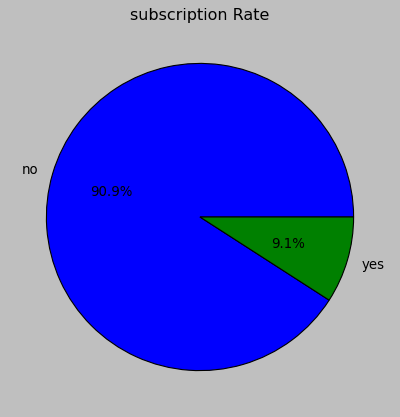

In [51]:
#plotting churn rate
def plot_churn_rate(data):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(bank['y'].value_counts(), labels=bank['y'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('subscription Rate')

    # Show the plot
    plt.show()
plot_churn_rate(bank['y'])


Around 90.9% of customers opted not to subscribe to a term deposit, leaving only a small fraction who did. Given this low subscription rate, marketing efforts could benefit from targeting specific customer segments more likely to subscribe.

Duration Distribution Analysis

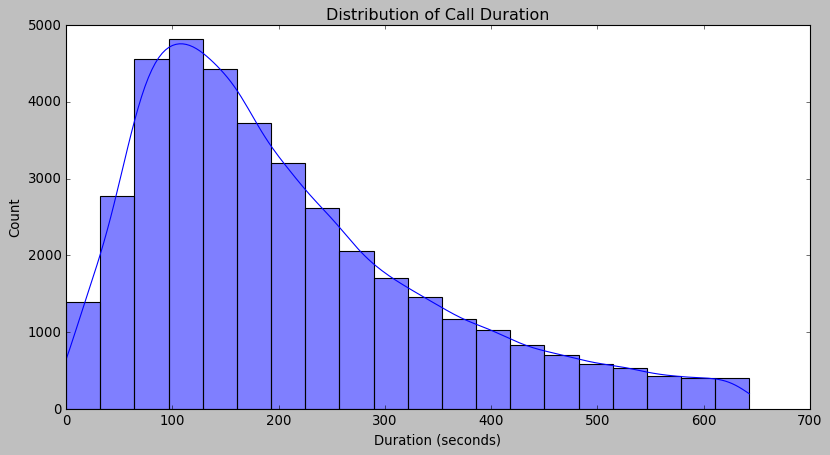

In [52]:
# Plotting the distribution of call duration
plt.figure(figsize=(12, 6))
sns.histplot(bank['duration'], bins=20, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

- **Right-Skewed Distribution:** The distribution of call durations is skewed to the right, indicating that most interactions are shorter, with only a few exceptionally long durations.
- **Peak at Short Durations:** The distribution's peak occurs at shorter call durations, suggesting that the majority of interactions are relatively brief.
- **Long Call Durations:** Notable outliers on the right side of the distribution represent a minority of interactions with very long durations.
- **Potential Significance:** Lengthier call durations might suggest more extensive conversations, potentially associated with successful subscription outcomes. Investigating whether longer durations correlate with higher subscription rates could be worthwhile.
- **Tailored Communication Strategies:** Considering this distribution, it could be beneficial to tailor communication strategies for both shorter and longer call durations. Shorter calls may focus on concise messaging, while longer calls might involve more detailed discussions.

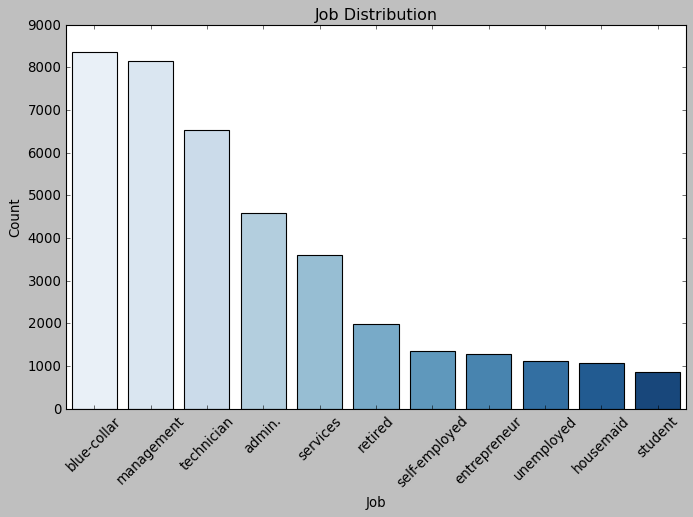

In [53]:
# Define a color palette using shades of blue
blue_palette = sns.color_palette("Blues", n_colors=len(bank['job'].unique()))

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=bank, x='job', order=bank['job'].value_counts().index, palette=blue_palette)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- **Most Common Jobs:** Predominant occupations among customers comprise "blue-collar," "management," "technician," and "admin."
- **Imbalanced Job Categories:** Certain job categories exhibit imbalance, with a notable disparity in the number of customers across different occupations.
- **Tailored Marketing Strategies:** Customizing marketing strategies based on job categories can be effective. For example, promotional campaigns or messaging can be tailored to resonate with specific professional groups.

Bivariate Analysis

Subscription Rate by Education

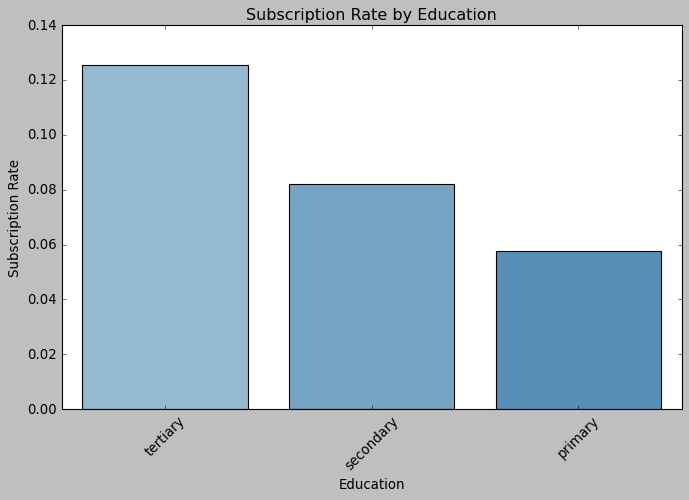

In [54]:
# Defining a custom color palette using darker shades of blue
custom_palette = sns.color_palette("Blues_d")

# Creating a pivot table to analyze the relationship between education and subscription status (y)
pivot_table = bank.pivot_table(index='education', columns='y', values='age', aggfunc='count', fill_value=0)
pivot_table['subscription_rate'] = pivot_table['yes'] / (pivot_table['yes'] + pivot_table['no'])

# Bar plot illustrating subscription rates across different education levels
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x=pivot_table.index, y='subscription_rate', order=pivot_table.sort_values(by='subscription_rate', ascending=False).index, palette=custom_palette)
plt.title('Subscription Rate by Education')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

- **Higher Education, Higher Subscription:** Customers with "tertiary" education exhibit the highest subscription rate, suggesting that individuals with advanced education levels are more inclined to subscribe to the term deposit.
- **Secondary Education Follows:** Following closely are customers with "secondary" education status, indicating a relatively high subscription rate among this group.
- **Lowest Subscription Rate for Primary Education:** Conversely, customers with a "primary" education level demonstrate the lowest subscription rate. This segment may require targeted and persuasive marketing efforts to boost their subscription rates.
- **Targeted Marketing Strategies:** To enhance subscription rates, marketing strategies can be refined to effectively target customers with higher education levels. Tailoring campaigns or promotions to resonate with customers holding "tertiary" education might yield favorable outcomes.

In [55]:
#### Age vs. Subscription (y)

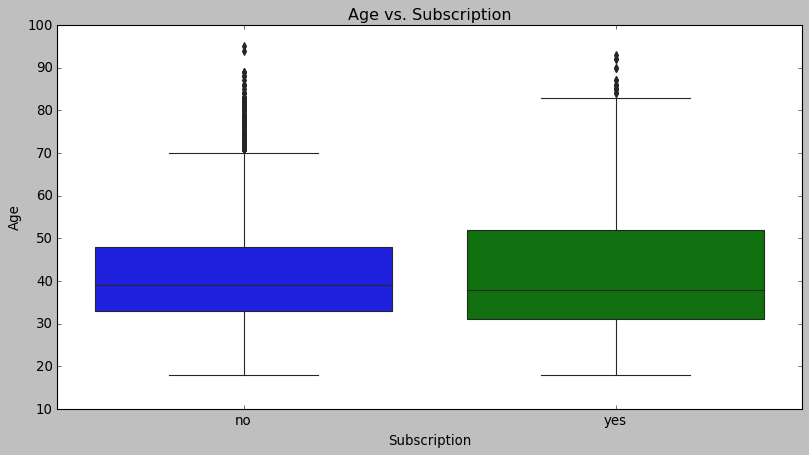

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank, x='y', y='age')
plt.title('Age vs. Subscription')
plt.xlabel('Subscription')
plt.ylabel('Age')
plt.show()


- **Age Discrepancy:** Customers who subscribed to the term deposit ("yes") generally exhibit a slightly higher median age compared to non-subscribers ("no").
- **Overlap in Age Distribution:** There is some overlap in the age distribution between both subscription categories. However, the "yes" category shows more outliers, indicating a greater age variation among subscribers.
- **Age's Influence:** While age alone may not be the sole determinant of subscription behavior, it appears to have some influence. Older customers might display a slightly higher inclination to subscribe, whereas younger customers may exhibit a broader range of subscription behaviors.

Subscription by Campaign

C:\Users\biraj\AppData\Local\Temp\ipykernel_9404\3998569775.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bank, x='campaign', y='y', ci=None, palette=custom_palette)


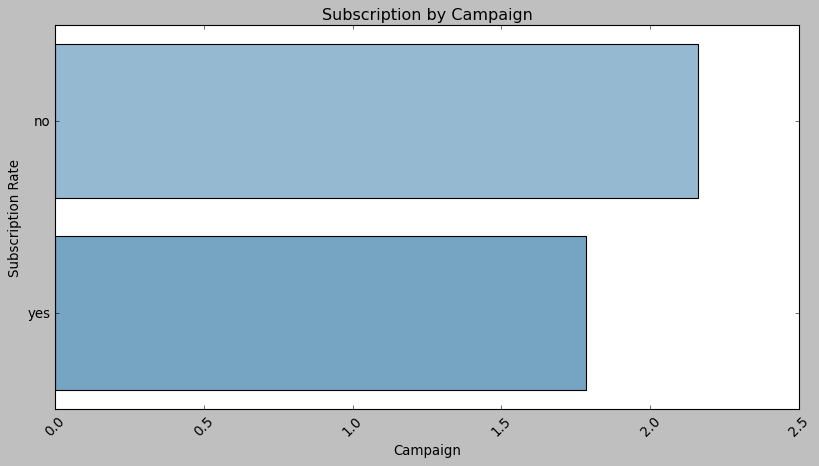

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(data=bank, x='campaign', y='y', ci=None, palette=custom_palette)
plt.title('Subscription by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()


- **Decreasing Subscription Rate:** An observed trend indicates that as the number of campaign contacts increases, the subscription rate tends to decline. This implies that repeated customer contacts during a campaign may yield diminishing returns and could be perceived as intrusive.
- **Optimizing Campaign Strategies:** To enhance subscription rates, marketers should focus on optimizing their campaign strategies. Rather than increasing the frequency of contacts, they should prioritize tailoring messages and interactions to be more compelling and relevant to the customer's needs and preferences.

Multivariate Analysis

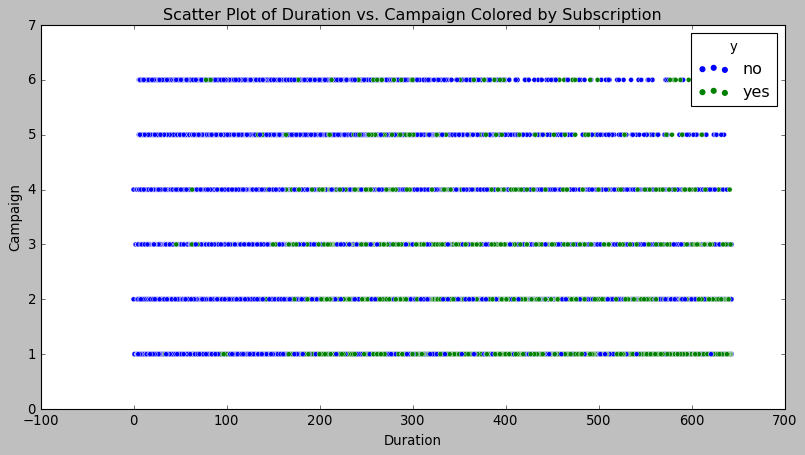

In [58]:
# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bank, x='duration', y='campaign', hue='y')
plt.title('Scatter Plot of Duration vs. Campaign Colored by Subscription')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()


- **Duration vs. Campaign Trend:** Longer last contact durations generally correlate with fewer campaign interactions. Subscribers ("y" = yes) tend to exhibit shorter campaign durations and longer last contact durations.
- **Marketing Strategy Implications:** Emphasizing shorter but more effective last contact interactions could boost subscription rates. Identifying and targeting customers within the subscriber cluster is essential.
- **Effectiveness of Campaign Contacts:** Excessive campaign contacts with short durations may not be as fruitful for achieving subscriptions. Quality interactions are prioritized over quantity.

Pairwise Scatter Plots

In [62]:
## Defining numerical columns for plotting
columns_to_plot = ['balance', 'duration', 'campaign', 'previous']


C:\Users\biraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


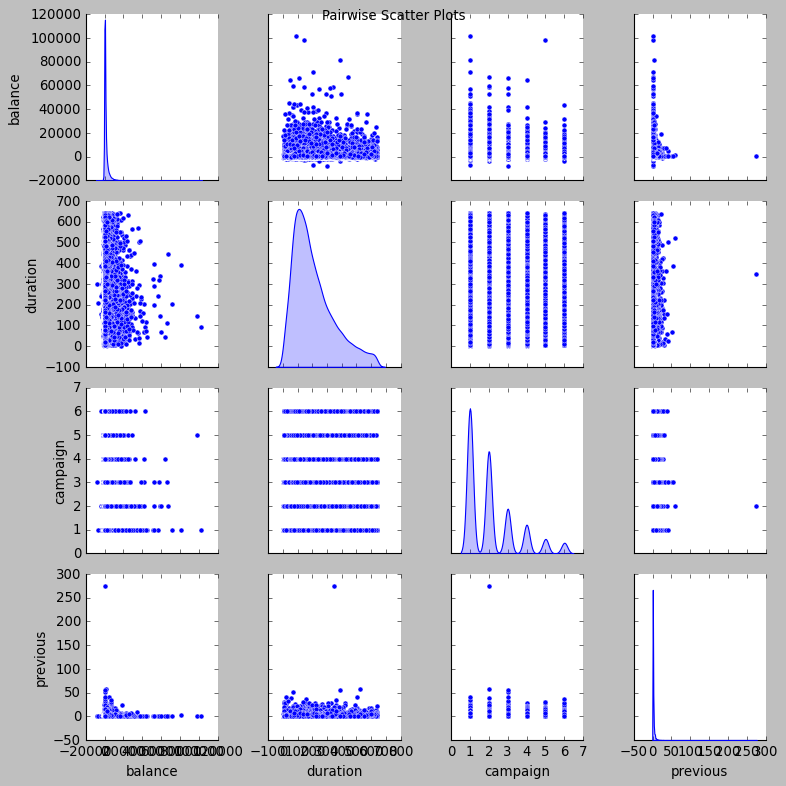

<Figure size 640x480 with 0 Axes>

In [66]:
sns.pairplot(data=bank[columns_to_plot], diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots')
plt.show()
plt.tight_layout()

- **Balance vs. Duration:** No significant correlation observed between balance and contact duration. Balance alone does not seem to predict the duration of contacts.
- **Balance vs. Campaign:** There appears to be no apparent association between balance and the number of campaign contacts.
- **Balance vs. Previous:** The balance does not appear to be a reliable indicator of prior campaign interactions.
- **Duration vs. Campaign:** Longer contact durations tend to correspond to fewer campaign contacts.
- **Duration vs. Previous:** There is no strong correlation between contact duration and prior campaign contacts.
- **Balance and Duration for Campaign Success:** Neither balance nor duration alone appear to be reliable predictors of campaign success.

In [69]:
#### Correlation matrix

In [70]:

# Select numerical columns for correlation 
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

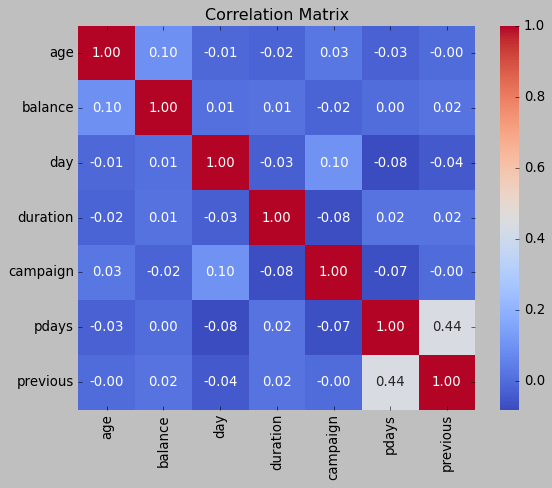

In [72]:
# Generating a correlation matrix for numerical variables


correlation_matrix = bank[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


- **Duration and Previous Contacts:** Positive correlation observed, suggesting that longer past conversations may lead to more prior interactions.
- **Duration and Campaign:** Negative correlation identified, implying that longer conversations may result in fewer follow-up contacts during the same campaign.
- **Previous Contacts and Campaign:** Mild positive correlation observed, indicating that customers with more prior interactions tend to have more contacts in the current campaign.
- **Pdays and Previous Contacts:** Weak negative correlation noted, hinting that customers contacted more in the past tend to have shorter intervals between contacts.

DATA PREPROCESSING

Check for multicollinearity

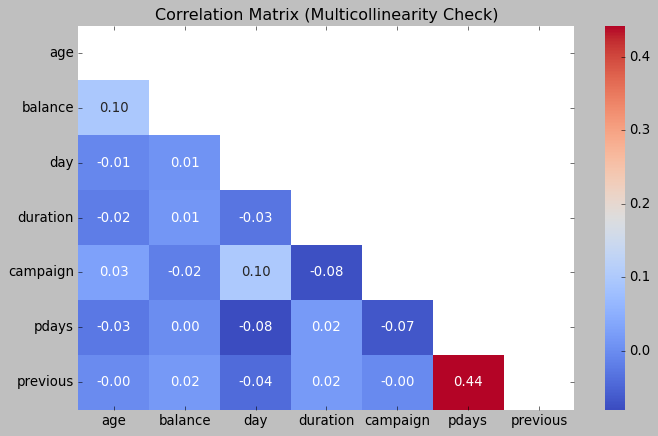

In [73]:
# Calculating the correlation matrix
correlation_matrix = bank[numerical_columns].corr()

# Creating a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generating a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Setting the plot title
plt.title('Correlation Matrix (Multicollinearity Check)')

# Displaying the plot
plt.show()

The variables are not highly correlated with each other hence no multicollinearity

In [74]:
### Convert  Column y to numeric(0s and 1s)
#The y feature need to be binary encoded to be used in the classification problem

In [75]:
# Convert binary categorical columns to numeric (yes/no to 1/0)
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

In [76]:
# display values in y
bank.y.unique()

array([0, 1], dtype=int64)

Assign the variables

assigning target variable to y for prediction and the rest of the Features to independebt variable X

In [79]:

##Assigning the data to X and y variables
y = bank['y']
X = bank.drop(columns=['y'], axis=1)


In [81]:
X.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0


One-hot encode the categorical features

One-hot encoding converts categorical variables into binary vectors, where each category becomes a separate binary feature.This is necessary step in order to build a classification model

In [82]:
categorical_columns = ['job', 'marital', 'education', 'month', 'housing', 'loan', 'default']

In [83]:
# Onehotencode
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])
# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")
# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df

C:\Users\biraj\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  self


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38842,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
38844,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [84]:
# One-hot encoding categorical variables
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])

# Retrieving feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

# Creating a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df


C:\Users\biraj\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  self


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38842,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
38844,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Scaling the numerical features

Scaling the numerical features is an essential preprocessing step before applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the dependent variable. Scaling ensures that numerical features are in the same range, making them directly comparable. This is crucial because SMOTE generates synthetic samples to balance the classes, and we want these synthetic samples to be consistent with the original data. Scaling prevents the introduction of unnecessary bias by ensuring that both original and synthetic samples exist within the same scaled range. Therefore, scaling is recommended before utilizing SMOTE to create a balanced dataset for modeling.

In [85]:
# Select the numerical columns to be scaled
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a StandardScaler object
scaler = MinMaxScaler()
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])

# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)

In [86]:
X_numeric_scaled_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.405910,0.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.234837,0.0,0.0,0.0
2,0.194805,0.072822,0.133333,0.118196,0.0,0.0,0.0
3,0.376623,0.086476,0.133333,0.143079,0.0,0.0,0.0
4,0.220779,0.074901,0.133333,0.216174,0.0,0.0,0.0


In [87]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,0.519481,0.092259,0.133333,0.405910,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.337662,0.073067,0.133333,0.234837,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.194805,0.072822,0.133333,0.118196,0.0,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.376623,0.086476,0.133333,0.143079,0.0,0.000000,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.220779,0.074901,0.133333,0.216174,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38842,0.714286,0.098678,0.533333,0.466563,0.0,0.047018,0.029091,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38843,0.090909,0.077388,0.533333,0.600311,0.2,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
38844,0.688312,0.088501,0.533333,0.709176,0.2,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
38845,0.506494,0.078868,0.533333,0.790047,0.6,0.000000,0.000000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [88]:
### Train-Test Split  
#I will split the data in 80% training and 20% testing data
# Perform train test split using sci kit learn train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_final, y, test_size =0.2, random_state=1)

SMOTE

Synthetic Minority Over-sampling Technique is used to handle imbalanced distribution of the target variable

In [89]:
y.value_counts()

y
0    35310
1     3537
Name: count, dtype: int64

MODEL
Baseline Model - Decision Tree Classifier